In [1]:
import Aluminum

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools

print(Aluminum.pseudo_name_list)

['Al.rel-pbe-paw.UPF', 'Al.rel-pbesol-uspp.UPF', 'Al.pz-vbc.UPF', 'Al.pbe-uspp.UPF']


In [11]:
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
#     'font.size' : 14.4,
    'font.size' : 17.28,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

%matplotlib notebook

# Surface relaxation

In [32]:
work_dir = 'surface'
pseudo_name = Aluminum.pseudo_name_list[-2]
a_0 = 7.46834
n_layers = 3
df = Aluminum.make_surface_df_template(n_layers)

vacuum_thickness = 14
ecutwfc_s = np.arange(10,45,5)
ecutrho_r = 4

degauss = 0.02
mixing_beta = 0.7
conv_thr_o = -6
n_k_points_hor_s = 6
n_k_points_ver = 1
k_points_shift = '1 1 0'

for ecutwfc in tqdm(ecutwfc_s):
    es,a_cs,t = Aluminum.surface_sim_relax(work_dir=work_dir,a_0=a_0,n_layers=n_layers,
                                           save_df=df,vacuum_thickness=vacuum_thickness,
                                           ecutwfc=ecutwfc,ecutrho_r=ecutrho_r,degauss=degauss,
                                           mixing_beta=mixing_beta,conv_thr_o=conv_thr_o,
                                           n_k_points_hor=n_k_points_hor,n_k_points_ver=n_k_points_ver,
                                           k_points_shift=k_points_shift)

df.to_csv(work_dir+'/n_l3_optimizing_ecutwfc.csv')

100%|██████████| 7/7 [03:24<00:00, 39.75s/it]


In [5]:
df.keys()

Index(['pseudo_name', 'a_0', 'vacuum_thickness', 'n_layers', 'ecutwfc',
       'ecutrho_r', 'degauss', 'mixing_beta', 'conv_thr_o', 'n_k_points_hor',
       'n_k_points_ver', 'k_point_shift', 'total_energy', 'n_it', 'sim_time',
       'z atom 1', 'z atom 2', 'z atom 3'],
      dtype='object')

<IPython.core.display.Javascript object>


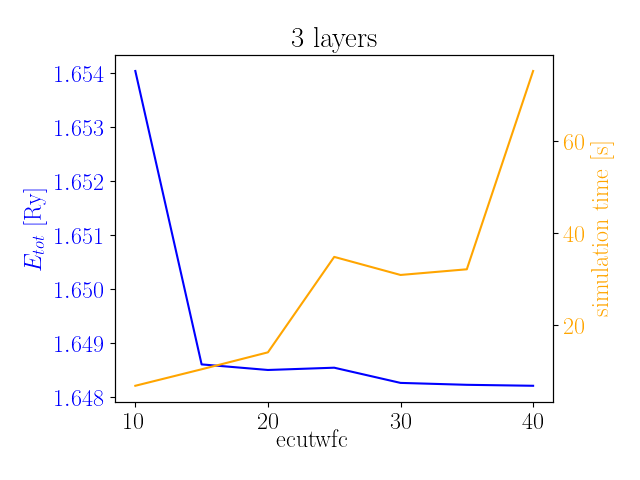

In [35]:
name = 'n_l3_ecutwfc'

fig,ax = plt.subplots()
ax.set_xlabel('ecutwfc')
color = 'blue'
ax.plot(df['ecutwfc'],df['z atom 3'],color=color)
ax.set_ylabel('$E_{tot}$ [Ry]',color=color)
ax.tick_params(axis='y',labelcolor=color)

ax2 = ax.twinx()
color = 'orange'
ax2.plot(df['ecutwfc'],df['sim_time'],color=color)
ax2.set_ylabel('simulation time [s]',color=color)
ax2.tick_params(axis='y',labelcolor=color)

ax.xaxis.set_label_coords(0.45,-0.08)
ax.set_title('%d layers' %df['n_layers'][0])

fig.tight_layout()

# fig.savefig('report/img/%s.pgf' %name)
# fig.savefig('report/img/%s.png' %name)

In [37]:
ecutwfc = 35
name = 'al-nl3'

es,a_cs,t = Aluminum.surface_sim_relax(work_dir=work_dir,a_0=a_0,n_layers=n_layers,
                                       vacuum_thickness=vacuum_thickness,name=name,
                                       ecutwfc=ecutwfc,ecutrho_r=ecutrho_r,degauss=degauss,
                                       mixing_beta=mixing_beta,conv_thr_o=conv_thr_o,
                                       n_k_points_hor=n_k_points_hor,n_k_points_ver=n_k_points_ver,
                                       k_points_shift=k_points_shift)

In [47]:
atom_index = 2

((a_cs[-1,atom_index,2] - a_cs[-1,atom_index - 1,2])*np.sqrt(2) - 1)*100

33.095153934284546

3 layers:

    vacuum_thickness = 14
    ecutwfc = 35
    n_k_hor = 6
    n_k_ver = 1
    
    Delta_z_01 = 33.095%